In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objs as go

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

import math
import random

%matplotlib notebook

In [2]:
sdssDF = pd.read_csv('star_classification.csv')
galaxyDF = sdssDF[sdssDF['class'] == 'GALAXY']
sampleDF = galaxyDF.sample(int(galaxyDF.shape[0] * 0.1)) #10% of set
sampleDF

obj_ID       alpha      delta         u         g         r  \
72084  1.237656e+18  340.033640  13.726286  23.68708  22.15207  20.58432   
24952  1.237658e+18  174.195154  49.441484  23.88483  23.86413  21.75177   
75033  1.237681e+18  328.052633  28.155133  23.17340  19.84548  18.45371   
7298   1.237661e+18  199.009451  47.088834  24.66730  22.33100  20.82555   
63137  1.237661e+18  221.367030  41.839963  23.13426  22.11879  20.56395   
...             ...         ...        ...       ...       ...       ...   
43998  1.237666e+18  229.712508  19.319564  20.85717  18.86910  17.81087   
17658  1.237650e+18  157.471042  -1.849382  23.86946  21.30876  20.02811   
38539  1.237661e+18  127.364970  28.532885  20.55077  18.60591  17.51051   
45681  1.237662e+18  235.997736  29.568253  22.60162  20.40829  18.73073   
38664  1.237674e+18  140.185257   3.762830  21.08376  19.02937  17.92391   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
72084  19.65488  19.03676    2507       301        4       154  5.679240e+18   
24952  20.56736  19.92857    2964       301        3       275  8.331754e+18   
75033  17.73488  17.38113    8156       301        1        49  6.715063e+18   
7298   19.78332  19.29428    3699       301        5        85  7.459240e+18   
63137  19.66881  19.23101    3699       301        5       197  6.824098e+18   
...         ...       ...     ...       ...      ...       ...           ...   
43998  17.29553  16.88541    4670       301        1       214  2.430900e+18   
17658  19.23660  18.99896    1140       301        4        30  4.261715e+18   
38539  17.02023  16.65717    3606       301        4        24  1.426674e+18   
45681  18.15804  17.76838    3919       301        3       211  5.316506e+18   
38664  17.43384  17.02164    6574       301        5       165  6.396088e+17   

        class  redshift  plate    MJD  fiber_ID  
72084  GALAXY  0.530186   5044  56186       731  
24952  GALAXY  0.621990   7400  57134       345  
75033  GALAXY  0.194890   5964  56098       713  
7298   GALAXY  0.551844   6625  56386       557  
63137  GALAXY  0.546661   6061  56076        67  
...       ...       ...    ...    ...       ...  
43998  GALAXY  0.088721   2159  54328       297  
17658  GALAXY  0.492744   3785  55241       669  
38539  GALAXY  0.145389   1267  52932       579  
45681  GALAXY  0.342896   4722  55735        22  
38664  GALAXY  0.144048    568  52254       355  

[5944 rows x 18 columns]

In [3]:
sampleDF = sampleDF[['alpha', 'delta', 'redshift']]
sampleDF.columns = ['ra', 'dec', 'redshift']
sampleDF

ra        dec  redshift
72084  340.033640  13.726286  0.530186
24952  174.195154  49.441484  0.621990
75033  328.052633  28.155133  0.194890
7298   199.009451  47.088834  0.551844
63137  221.367030  41.839963  0.546661
...           ...        ...       ...
43998  229.712508  19.319564  0.088721
17658  157.471042  -1.849382  0.492744
38539  127.364970  28.532885  0.145389
45681  235.997736  29.568253  0.342896
38664  140.185257   3.762830  0.144048

[5944 rows x 3 columns]

In [4]:
ra = tuple(sampleDF['ra'])
dec = tuple(sampleDF['dec'])
redshift = tuple(sampleDF['redshift'])

<IPython.core.display.Javascript object>


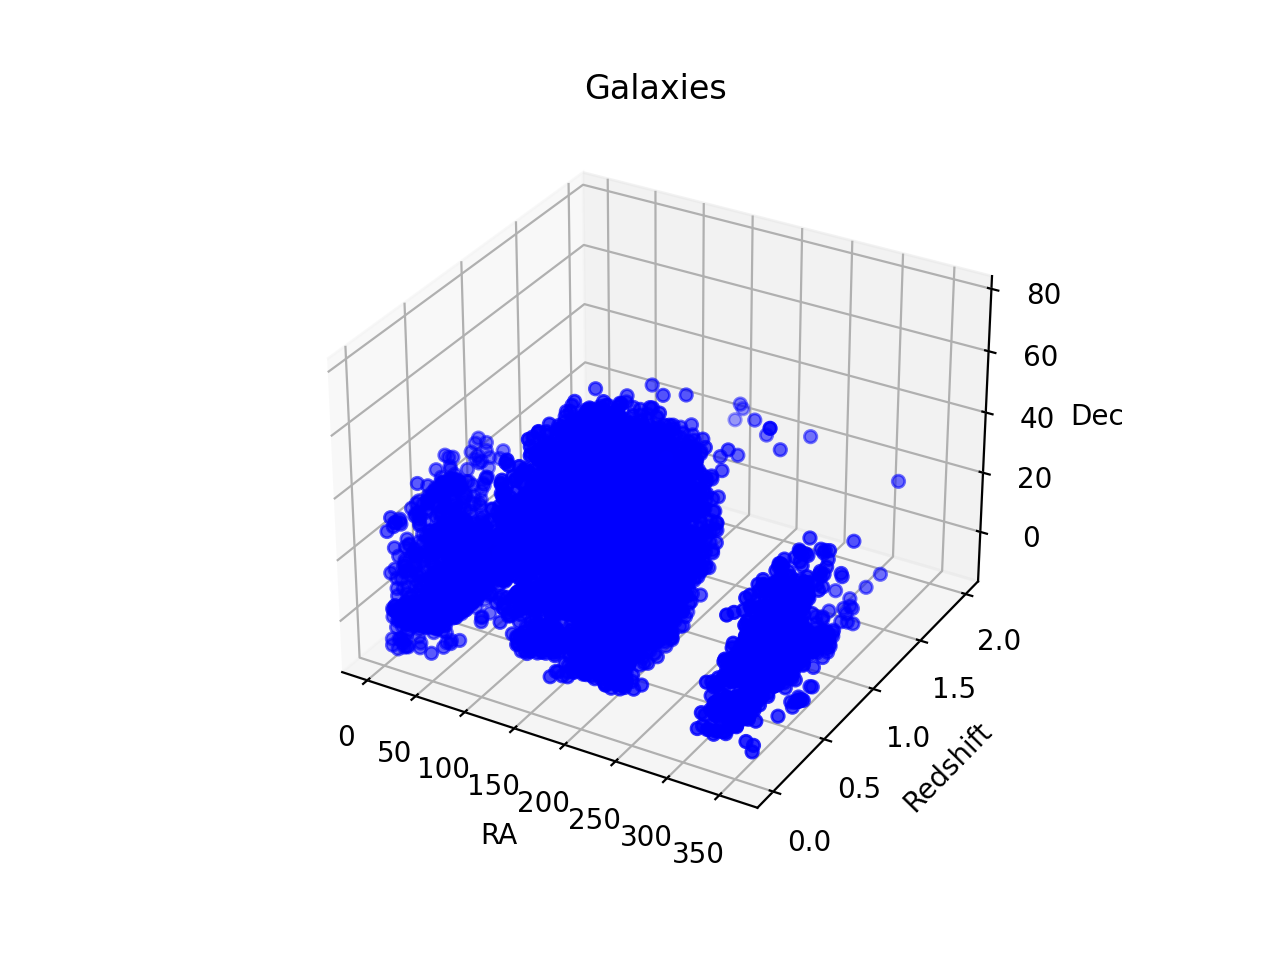

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ra, redshift, dec, c='b', marker='o')

ax.set_xlabel('RA')
ax.set_ylabel('Redshift')
ax.set_zlabel('Dec')

ax.set_title('Galaxies')

plt.show()

<IPython.core.display.Javascript object>


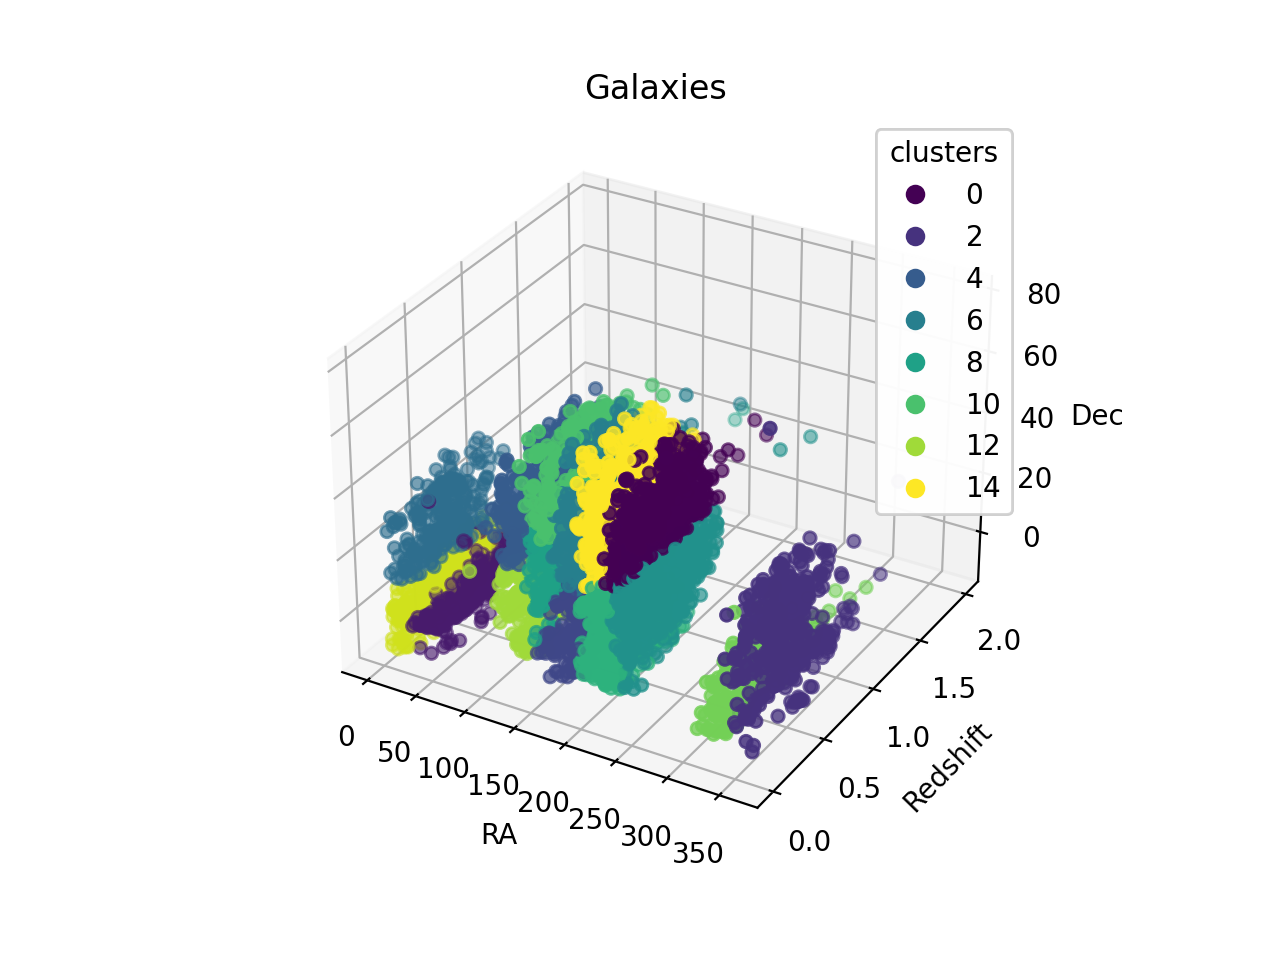

/Users/srivi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

data = np.vstack((ra, redshift, dec)).T

#num_clusters = random.randint(1, 100)
num_clusters = 15 # TEMP VAR

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)
labels = kmeans.labels_

scatter = ax.scatter(ra, redshift, dec, c=labels)

legend1 = ax.legend(*scatter.legend_elements(), title="clusters")
ax.add_artist(legend1)

ax.set_xlabel('RA')
ax.set_ylabel('Redshift')
ax.set_zlabel('Dec')

ax.set_title('Galaxies')

plt.show()

In [7]:
sampleDF['cluster'] = labels
clusters = kmeans.cluster_centers_
clustersDF = pd.DataFrame(clusters, columns=['ra', 'redshift', 'dec'])
clustersDF = clustersDF[['ra', 'dec', 'redshift']]
clustersDF

/var/folders/sj/cyrxvp_13qz06k7r19pd0d_w0000gn/T/ipykernel_10867/3954991908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampleDF['cluster'] = labels


ra        dec  redshift
0   235.513630  44.560721  0.398592
1    41.886065  -0.555815  0.434267
2   348.329698  14.374922  0.494933
3   174.857192   5.425228  0.337505
4   128.939648  40.525804  0.440313
5    12.542299  19.551929  0.469753
6   182.191243  42.496231  0.399404
7   243.688882  22.421900  0.330501
8   153.210612  25.362047  0.502657
9   212.495974  11.384612  0.301018
10  157.604603  52.435927  0.433346
11  328.717516   3.901526  0.433488
12  130.354270  14.831551  0.451993
13   15.051406  -0.818514  0.510109
14  207.733427  47.399890  0.409182

In [8]:
supercluster_centers = []

#num_superclusters = random.randint(1, 10)
num_superclusters = 5 #TEMP VAR

for cluster_id in range(num_clusters):
    cluster_data = sampleDF[sampleDF['cluster'] == cluster_id][['ra', 'redshift', 'dec']]
    supercluster_kmeans = KMeans(n_clusters=num_superclusters)
    supercluster_kmeans.fit(cluster_data)
    supercluster_centers.extend(supercluster_kmeans.cluster_centers_)

/Users/srivi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/srivi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/srivi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/srivi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [9]:
supercluster_centers = np.array(supercluster_centers)

scatter = go.Scatter3d(
    x=ra,
    y=redshift,
    z=dec,
    mode='markers',
    marker=dict(size=3, opacity=0.5, color=labels),
    name='Clusters'
)

supercluster_scatter = go.Scatter3d(
    x=supercluster_centers[:, 0],
    y=supercluster_centers[:, 1],
    z=supercluster_centers[:, 2],
    mode='markers',
    marker=dict(size=10, color='red'),
    name='Superclusters'
)

layout = go.Layout(
    title='Superclusters',
    scene=dict(
        xaxis=dict(title='RA'),
        yaxis=dict(title='Redshift'),
        zaxis=dict(title='Dec'),
    )
)

fig = go.Figure(data=[scatter, supercluster_scatter], layout=layout)

fig.show()